In [1]:
import numpy as np
import itertools

In [2]:
treatment = [85,88,75,66,25,29,83,39,97]
placebo = [68,41,10,49,16,65,32,92,28,98]

In [3]:
def permutation_t_stat(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [4]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [5]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)] 
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

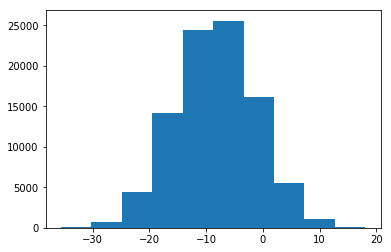

In [9]:
import matplotlib.pyplot as plt

plt.hist(permutation_zero_dist_ind(treatment, placebo))
plt.show()

In [17]:
def permutation_test(sample1, sample2, max_permutations = None, alternative = 'two-sided'):
    
    t_stat = permutation_t_stat(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [18]:
print("p-value: %f" % permutation_test(treatment, placebo))

p-value: 0.164314
